# Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.


### Análisis descriptivo de los datos

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# se carga el dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# Crear un dataframe
df = pd.concat([X, y], axis=1)
# metadata 
print(covertype.metadata) 
  
# variable information 
print(covertype.variables) 

# Mostrar las primeras filas del dataframe
print(df.head())

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

¿Cuántas instancias de datos tiene el dataset?

In [3]:
## PON AQUÍ TU CÓDIGO
df.shape

(581012, 55)

## Respuesta
El dataset presenta un total de <b>581.012</b> Registros informados.

¿Cuántas variables continuas hay en el dataset?

In [4]:
#Rango de valores por columna
print(df.max() - df.min())

Elevation                             1999
Aspect                                 360
Slope                                   66
Horizontal_Distance_To_Hydrology      1397
Vertical_Distance_To_Hydrology         774
Horizontal_Distance_To_Roadways       7117
Hillshade_9am                          254
Hillshade_Noon                         254
Hillshade_3pm                          254
Horizontal_Distance_To_Fire_Points    7173
Wilderness_Area1                         1
Soil_Type1                               1
Soil_Type2                               1
Soil_Type3                               1
Soil_Type4                               1
Soil_Type5                               1
Soil_Type6                               1
Soil_Type7                               1
Soil_Type8                               1
Soil_Type9                               1
Soil_Type10                              1
Soil_Type11                              1
Soil_Type12                              1
Soil_Type13

Hay 10 Variables continuas:
*   Elevation                            
*   Aspect                                
*   Slope                                 
*   Horizontal_Distance_To_Hydrology      
*   Vertical_Distance_To_Hydrology        
*   Horizontal_Distance_To_Roadways       
*   Hillshade_9am                         
*   Hillshade_Noon                        
*   Hillshade_3pm                         
*   Horizontal_Distance_To_Fire_Points

¿Cuántas variables categóricas hay en el dataset? Indica las categorías.


Según lo informado en el origen de los datos y lo que se puede observar, tenemos cómo datos categóricos los atributos binarios de las áreas silvestres y tipos de suelo. Ademas de la variable tipo de cubierta forestal que clasifica en 7 tipos distintos.

Hay un total de 45 variables categóricas:                        
*   Soil_Type1                               
*   Soil_Type2                               
*   Soil_Type3                               
*   Soil_Type4                               
*   Soil_Type5                               
*   Soil_Type6                               
*   Soil_Type7                               
*   Soil_Type8                               
*   Soil_Type9                               
*   Soil_Type10                              
*   Soil_Type11                              
*   Soil_Type12                              
*   Soil_Type13                              
*   Soil_Type14                              
*   Soil_Type15                              
*   Soil_Type16                              
*   Soil_Type17                              
*   Soil_Type18                              
*   Soil_Type19                              
*   Soil_Type20                              
*   Soil_Type21                              
*   Soil_Type22                              
*   Soil_Type23                              
*   Soil_Type24                              
*   Soil_Type25                              
*   Soil_Type26                              
*   Soil_Type27                              
*   Soil_Type28                              
*   Soil_Type29                              
*   Soil_Type30                              
*   Soil_Type31                              
*   Soil_Type32                              
*   Soil_Type33                              
*   Soil_Type34                              
*   Soil_Type35                              
*   Soil_Type36                              
*   Soil_Type37                              
*   Soil_Type38                              
*   Soil_Type39                              
*   Soil_Type40  
*   Wilderness_Area1                             
*   Wilderness_Area2                         
*   Wilderness_Area3                         
*   Wilderness_Area4                         
*   Cover_Type                               

¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


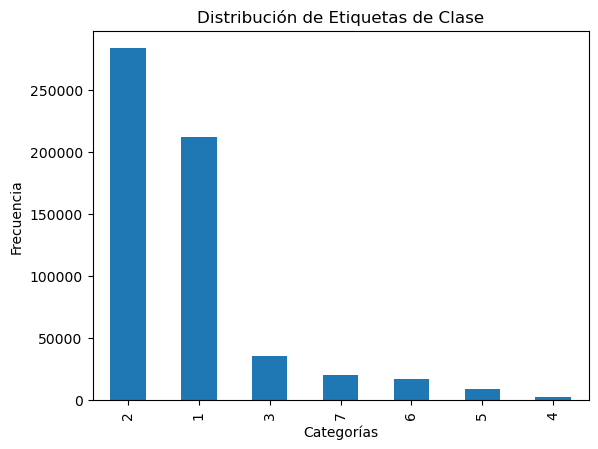

In [5]:
# Mostrar la distribución de etiquetas de clase
print(df['Cover_Type'].value_counts())

# Graficar la distribución de etiquetas de clase
df['Cover_Type'].value_counts().plot(kind='bar')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Distribución de Etiquetas de Clase')
plt.show()

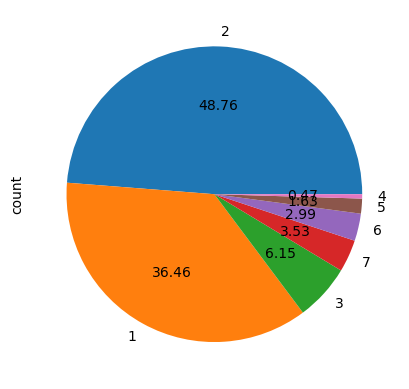

In [6]:
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

####   El dataset no está balanceado, las clases 2 y 1 están sobrerrepresentadas y las clases 4, 5, 6, y 7 están subrepresentadas.

Nota: El desbalanceo puede llevar a un modelo que este sesgado hacia las clases más frecuentes.

¿Existen valores nulos o perdidos en el dataset?

In [7]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0


In [8]:
# conteo de ceros por columna
print((df == 0).sum())

Elevation                                  0
Aspect                                  4914
Slope                                    656
Horizontal_Distance_To_Hydrology       24603
Vertical_Distance_To_Hydrology         38665
Horizontal_Distance_To_Roadways          124
Hillshade_9am                             13
Hillshade_Noon                             5
Hillshade_3pm                           1338
Horizontal_Distance_To_Fire_Points        51
Wilderness_Area1                      320216
Soil_Type1                            577981
Soil_Type2                            573487
Soil_Type3                            576189
Soil_Type4                            568616
Soil_Type5                            579415
Soil_Type6                            574437
Soil_Type7                            580907
Soil_Type8                            580833
Soil_Type9                            579865
Soil_Type10                           548378
Soil_Type11                           568602
Soil_Type1

No hay valores nulos en el dataset. Respecto a los datos perdidos no esta anotado ningún valor asociado a esta perdida en el origen de los datos y no hay valores que reflejen un comportamiento similar en los datos.


¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamosfiltar aquellas correlaciones superiores al 0.80 con la variable de clase.

In [10]:

correlation_matrix = df.corr()

# correlaciones de 'Cover_Type' 
target_correlations = correlation_matrix['Cover_Type']

# Ordenamos las correlaciones por su valor absoluto en orden descendente
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

# Mostrar las correlaciones más significativas 
print(sorted_correlations[1:])

Wilderness_Area4                      0.323200
Elevation                             0.269554
Soil_Type10                           0.243876
Wilderness_Area1                      0.203913
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Horizontal_Distance_To_Roadways       0.153450
Slope                                 0.148285
Soil_Type22                           0.141746
Soil_Type23                           0.135055
Soil_Type40                           0.128351
Soil_Type29                           0.124933
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Horizontal_Distance_To_Fire_Points    0.108936
Soil_Type4                            0.099672
Hillshade_Noon                        0.096426
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type35                           0.080315
Soil_Type37  

No existe una variable altamente correlacionadas, dado que el atributo con la correlación más alta con la variable objetivo es de 0,3232 (Wilderness_Area4) que es considerada una correlación moderada. Esta correlación no seria la forma de calcular correctamente dado que la variable objetivo es de tipo categórica multiclase pero en el punto siguiente se utiliza las estadísticas spearman donde si podemos ver que hay una correlación con el mismo campo pero del 0,3759 que es una correlación algo mejor y representativamente más correcta. **Donde podemos ver que la variable más correlacionada es Elevation con una correlación negativa de -0.4911 que tampoco se puede considerar una correlación alta**

¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

In [87]:
from scipy.stats import spearmanr

# Calcula la correlación de Spearman entre 'Cover_Type' y otras variables
correlations = {}
for column in df.columns:
    if column != 'Cover_Type':
        spearman_corr, p_value = spearmanr(df['Cover_Type'], df[column])
        correlations[column] = spearman_corr

# Ordena las correlaciones en orden descendente
sorted_correlations = sorted(correlations.items(), key=lambda item: item[1], reverse=True)

# Muestra las correlaciones ordenadas
for column, correlation in sorted_correlations:
    print(f"Correlation with 'Cover_Type' for {column}: {correlation}")


Correlation with 'Cover_Type' for Wilderness_Area4: 0.3759990464283222
Correlation with 'Cover_Type' for Soil_Type10: 0.268381493805451
Correlation with 'Cover_Type' for Soil_Type4: 0.17192518259175235
Correlation with 'Cover_Type' for Soil_Type2: 0.15868469909557228
Correlation with 'Cover_Type' for Slope: 0.15107849350928662
Correlation with 'Cover_Type' for Soil_Type6: 0.14606853464932634
Correlation with 'Cover_Type' for Soil_Type3: 0.11269300716829772
Correlation with 'Cover_Type' for Soil_Type1: 0.11019936301922689
Correlation with 'Cover_Type' for Vertical_Distance_To_Hydrology: 0.09568253433742387
Correlation with 'Cover_Type' for Soil_Type17: 0.08404648068362645
Correlation with 'Cover_Type' for Soil_Type11: 0.0813307615890652
Correlation with 'Cover_Type' for Soil_Type5: 0.08124833386756608
Correlation with 'Cover_Type' for Soil_Type12: 0.06198110125482033
Correlation with 'Cover_Type' for Soil_Type13: 0.060995697506045936
Correlation with 'Cover_Type' for Soil_Type14: 0.0521

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df[['Wilderness_Area4', 'Elevation', 'Soil_Type10']]
y = df['Cover_Type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Importancia de las características
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

              precision    recall  f1-score   support

           1       0.65      0.69      0.67     63556
           2       0.71      0.76      0.73     85078
           3       0.62      0.59      0.61     10638
           4       0.30      0.06      0.10       795
           5       0.00      0.00      0.00      2941
           6       0.45      0.20      0.27      5227
           7       0.54      0.25      0.34      6069

    accuracy                           0.67    174304
   macro avg       0.47      0.36      0.39    174304
weighted avg       0.65      0.67      0.66    174304

Accuracy: 0.6724515788507436
Elevation           0.788849
Wilderness_Area4    0.166744
Soil_Type10         0.044407
dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cómo hipótesis daría que las variables independientes más correlacionadas (Que coincide con los valores más altas arrojados con spearman) con la variable objetivo son las que más influencia tienen a la hora de clasificar los datos. Para comprobar si esto es cierto podemos usar una de las particularidades del modelo Random Forest Classifier que se trata de la función feature_importance que nos aporta el grado de importancia de los atributos para la clasificación realizada.

Resultados:
*   Accuracy: 0.6724515788507436
*   Elevation           0.788849
*   Wilderness_Area4    0.166744
*   Soil_Type10         0.044407




Conclusión:

Una precisión del 67% no es muy alta, pero cómo dada la distribución de los datos no esta balanceada esta puede ser compleja y que requiera de ajustar mejor los hiperparámetros, que no se trata del objetivo de esta hipótesis.

La hipótesis de que Elevation, Wilderness_Area4, y Soil_Type10 son las tres variables más influyentes puede considerarse incompleta. Elevation es claramente importante, pero las otras dos variables no parecen ser las más influyentes en comparación. Esto sugiere que podría haber otras variables en el dataset con mayor influencia que no fueron identificadas inicialmente.

<b>¿Cómo se podría obtener las tres feature que más influencian a la variable objetivo?</b>

Calcular la importancia de todas las variables utilizando el modelo de bosque aleatorio y seleccionar las tres más importantes.

##  *Antes de empezar las clasificación se reduce el número de registros donde la frecuencia de cada clase sea la misma que la clase con la frecuencia minima, para así reducir el coste computacional.*

<h3>Pasos seguidos</h3>
Primero, calcula la frecuencia minima entre las clases en la columna 'Cover_Type'. Luego, itera sobre cada clase y selecciona una muestra de tamaño equivalente a la cantidad de registros de la clase con la frecuencia minima obtenida en el primer punto. Esto garantiza que la muestra final tenga una distribución equilibrada de las clases. Finalmente, reordena aleatoriamente la el nuevo dataset. Nº de registros: 19229

In [12]:
# Obtener la proporción de clases
clase_counts = df['Cover_Type'].value_counts()

# Calcular la frecuencia mínima de clase
min_count = clase_counts.min()

# Definir el número total de muestras
n = min_count * len(clase_counts)

sampled_data = pd.DataFrame()

# Iterar sobre cada clase para seleccionar una muestra equilibrada
for clase in clase_counts.index:
    # Seleccionar min_count registros de cada clase
    clase_data = df[df['Cover_Type'] == clase].sample(min_count, random_state=42)
    sampled_data = pd.concat([sampled_data, clase_data], ignore_index=True)

sampled_data = sampled_data.sample(frac=1, random_state=42)

print(sampled_data['Cover_Type'].value_counts())




Cover_Type
2    2747
6    2747
4    2747
3    2747
5    2747
1    2747
7    2747
Name: count, dtype: int64


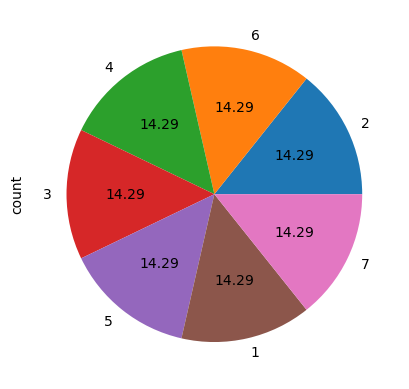

In [13]:
#Comparativa mantenienod las mismas proporciones
sampled_data['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

In [65]:
# Separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = sampled_data.drop('Cover_Type',axis=1),sampled_data['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

*    **n_estimators:** 

Permite definir el número de arboles que se generan, por defecto 100.
*    **criterion:**

Permite definir la función que se emplea para evaluar la calidad de división en cada nodo del árbol de decisión. Admite 3 opciones: (gini, entropy y log_loss) por defecto gini.
*    **max_depth**: 

Define el nivel máximo de profundidad que se expanden los nodos de los árboles. Si el parámetro es None (Por defecto es None), entonces los nodos se expanden asta que los nodos sean puros o estén por debajo del umbral de muestras mínimas de división (min_samples_split)
*    **min_samples_split**:

El número mínimo de muestras necesarias para dividir un nodo interno (Por defecto 2). Si es un entero (int), representa el número mínimo de muestras. Si es un flotante (float), representa una fracción y el mínimo número de muestras para cada división es (min_samples_split * n_samples).
*    **min_samples_leaf**: 

Define el número mínimo de muestras recogidas en un nodo para que se considere una Hoja (Por defecto 1). Si es un entero (int), representa el número mínimo de muestras. Si es un flotante (float), representa una fracción y el mínimo número de muestras para cada división es (min_samples_leaf * n_samples).
*    **max_features**:

Define el número de características a tener en cuenta al buscar la mejor división. Si es un entero, se consideran max_features características en cada división. Si es un flotante, se considera una fracción, específicamente max(1, int(max_features * n_features_in_)) características. Si es "sqrt", se considera la raíz cuadrada del número total de características; si es "log2", se considera el logaritmo en base 2 del número total de características. Si es None, se consideran todas las características disponibles (n_features).

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Permite añadir peso a las clases que queremos clasificar (Por defecto None: Todas las clases tienen peso 1). Esto puede ser de utilidad para aquellas variables objetivo que muestran un desbalanceo en la distribución de etiquetas de la clase, añadiendo mayor peso a aquellas clases con menor número de registros.

*   Permite administrar por parámetro la lista de pesos de las clases.
*   Permite definir cómo se balancea:
    *   El modo "balanced" ajusta automáticamente los pesos inversamente proporcionales a las frecuencias de las clases en los datos de entrada cómo 𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠/(𝑛_𝑐𝑙𝑎𝑠𝑠𝑒𝑠∗𝑛𝑝.𝑏𝑖𝑛𝑐𝑜𝑢𝑛𝑡(𝑦))n_samples/(n_classes∗np.bincount(y)). 
    *   El modo "balanced_subsample" es similar, pero los pesos se calculan en base a la muestra de bootstrap para cada árbol.
    


Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

En Random Forest no hace falta escalar ni normalizar los datos porque su algoritmo no lo necesita. Los árboles de decisión, que forman la base de Random Forest, crean divisiones usando umbrales específicos para cada característica, sin importar su escala. Esto significa que pueden manejar datos con rangos muy diferentes sin problemas. Además, cada característica se trata por separado, por lo que no importa si tienen distribuciones distintas. Por eso, se puede usar Random Forest sin preocuparte por ajustar las escalas de tus datos.


Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [66]:
# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.ensemble import RandomForestClassifier

n_arboles = {5, 10, 20, 50 , 100}
particion = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_feature = None

randomForest = [RandomForestClassifier(n_estimators = i, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None) for i in n_arboles]


In [67]:
# PON AQUÍ TU CÓDIGO PARA EL ENTRENAMIENTO
for rf in randomForest:
    rf.fit(X_train, y_train)
    print(f"Modelo con {rf.n_estimators} árboles entrenado.")

Modelo con 50 árboles entrenado.
Modelo con 100 árboles entrenado.
Modelo con 5 árboles entrenado.
Modelo con 20 árboles entrenado.
Modelo con 10 árboles entrenado.


Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

rf_n_estimators_20 = randomForest[3]  

y_pred = rf_n_estimators_20.predict(X_test)

print(confusion_matrix(y_test,y_pred))

[[387  99   0   0  21   0  33]
 [ 89 304  14   0 101  18   5]
 [  0   7 386  31  14 111   0]
 [  0   0  12 537   0   8   0]
 [  2  20  11   0 512  13   0]
 [  0   1  77  12  31 434   0]
 [ 39   0   0   0   1   0 516]]


¿Cuántos ejemplos ha clasificado correctamente?

In [69]:
print(f"Número de ejemplos clasificados correctamente: {np.trace(confusion_matrix(y_test,y_pred))}")

Número de ejemplos clasificados correctamente: 3076


Número de ejemplos clasificados correctamente: 3076

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.72      0.73       540
           2       0.71      0.57      0.63       531
           3       0.77      0.70      0.74       549
           4       0.93      0.96      0.94       557
           5       0.75      0.92      0.83       558
           6       0.74      0.78      0.76       555
           7       0.93      0.93      0.93       556

    accuracy                           0.80      3846
   macro avg       0.80      0.80      0.79      3846
weighted avg       0.80      0.80      0.80      3846



Algunas clases tienen un mejor rendimiento que otras. Por ejemplo, las clases 4 y 7 tienen una precisión, recall y F1-score más altos en comparación con las demás clases, lo que indica que el modelo es mejor para clasificar esas clases. Por otro lado, las clases 2 tiene métricas más bajas, lo que sugiere que el modelo tiene más dificultades para clasificar esa clases. La precisión global del modelo es del 80%, lo que indica la capacidad general de clasificación del modelo en todas las clases es bastante bueno.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [71]:
from sklearn.metrics import precision_score

# Precisión promedio de cada modelo
mean_precision = []

# Evaluar los modelos
for i, rf in enumerate(randomForest):
    y_pred = rf.predict(X_test)
    precision = precision_score(y_test, y_pred, average=None)
    mean_precision.append((i, precision.mean()))

# Ordenar los modelos por precisión promedio
mean_precision.sort(key=lambda x: x[1], reverse=True)

# Mostrar los resultados
for i, mean_prec in mean_precision:
    print(f"Modelo con {randomForest[i].n_estimators} árboles: Precisión promedio {mean_prec:.4f}")


Modelo con 50 árboles: Precisión promedio 0.8027
Modelo con 100 árboles: Precisión promedio 0.7996
Modelo con 20 árboles: Precisión promedio 0.7970
Modelo con 10 árboles: Precisión promedio 0.7920
Modelo con 5 árboles: Precisión promedio 0.7825


Para determinar qué modelo obtiene los mejores resultados de precisión para el conjunto de datos de test, se calcula las precisiones de cada modelo para cada clase y calcular la media de estas precisiones para cada modelo dándonos los siguientes promedios por modelo:
*   Modelo con 50 árboles: Precisión promedio 0.8027
*   Modelo con 100 árboles: Precisión promedio 0.7996
*   Modelo con 20 árboles: Precisión promedio 0.7970
*   Modelo con 10 árboles: Precisión promedio 0.7920
*   Modelo con 5 árboles: Precisión promedio 0.7825

El modelo que arroja mejores resultados en términos de precision es el de **50 árboles con una precisión promedio del 80,27%**

Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

In [21]:
# Evaluar los modelos
for rf in randomForest:
    score = rf.score(X_test, y_test)
    print(f"Exactitud del modelo con {rf.n_estimators} árboles: {score:.4f}")

Exactitud del modelo con 50 árboles: 0.7677
Exactitud del modelo con 100 árboles: 0.7664
Exactitud del modelo con 5 árboles: 0.7342
Exactitud del modelo con 20 árboles: 0.7646
Exactitud del modelo con 10 árboles: 0.7483


El modelo que mejores resultados arroja para los resultados de los test es el de **50 árboles** dado que tiene la precisión promedia de las clases más alta del 80,27% y también el el f1-score promedio más alto del 76,77% (Resultados muy cercanos al modelo de 100 árboles con pocas décimas de diferencia) 

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


In [72]:
rf_n_estimators_50 = randomForest[0]  

y_pred = rf_n_estimators_50.predict(X_test)

print(confusion_matrix(y_test,y_pred))

[[399  87   0   0  24   0  30]
 [ 99 289  15   0 109  18   1]
 [  0   4 382  32  18 113   0]
 [  0   0  14 535   0   8   0]
 [  2  16  10   0 519  11   0]
 [  0   0  63  11  31 450   0]
 [ 38   0   0   0   1   0 517]]


In [73]:
print(f"Número de ejemplos clasificados correctamente: {np.trace(confusion_matrix(y_test,y_pred))}")

print(f"Número de ejemplos clasificados incorrectamente: {np.sum(confusion_matrix(y_test,y_pred)) - np.trace(confusion_matrix(y_test,y_pred))}")

Número de ejemplos clasificados correctamente: 3091
Número de ejemplos clasificados incorrectamente: 755


Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.74      0.74       540
           2       0.73      0.54      0.62       531
           3       0.79      0.70      0.74       549
           4       0.93      0.96      0.94       557
           5       0.74      0.93      0.82       558
           6       0.75      0.81      0.78       555
           7       0.94      0.93      0.94       556

    accuracy                           0.80      3846
   macro avg       0.80      0.80      0.80      3846
weighted avg       0.80      0.80      0.80      3846



El modelo no clasifica de manera igual todas las clases y muestra una mayor capacidad predictiva para algunas clases en comparación con otras:
*   Las clases con mejor capacidad predictiva son las clases 4,5,7 con precisiones superiores al 74% y recalls cercanos o superiores al 93%, destacando la clase 4 y 7 con el mayor porcentaje de f1-score del 94% 
*   Por otra parte tenemos las clases 1,2,3,6 que ofrecen una precisiones buenas y tiene un recall moderado, destacando la clase 2 con apenas un 54%, dando cómo resultado que se pierden instancias positivas para estas clases siendo la clase 6 la que tiene mejores resultados para este grupo.

        Nota: En una primera iteración sin balanceo arroja el siguiente análisis:
        *   Las clases con mejor capacidad predictiva son las clases 1, 2, 3 y 7 con precisiones superiores al 75% y recalls cercanos o superiores al 70%, destacando la clase 2 con el mayor porcentaje de f1-score del 81%
        *   Por otra parte tenemos las clases 4,5 y 6 que no tienen por si una mala precisión pero tiene un recall muy bajo (ninguna superaba el 50%) destacando la clase 5 con apenas un 18%, dando cómo resultado que se pierden instancias positivas para estas 

**Support Vector Machine**

In [25]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

- **C**

Controla el equilibrio entre el doble objetivo de maximizar el margen y minimizar el error cometido. C multiplica a los errores cometidos, de forma que un valor bajo de C tiende a penalizar poco los errores, permitiendo márgenes mayores a costa de cometer más errores, mientras que un valor alto de C penaliza mucho los errores, llevando al modelo a cometer menos errores a costa de un margen menor.


Entrada parámetro que ajusta el valor de C, que por defecto tiene el valor '1,0'.
- **kernel**

Especifica el tipo de kernel a utilizar. Cada opción representa una función diferente para calcular el producto escalar en un espacio de características superior, lo cual permite al SVM manejar problemas no lineales

Admite las siguientes opciones cómo parámetro:
*   Lineal:
    
Utiliza un kernel lineal. En este caso, el SVM es equivalente a un clasificador lineal. Este kernel es útil cuando los datos son linealmente separables.
*   Poly: 

Este kernel permite la separación no lineal de los datos mediante la aplicación de un polinomio de grado d.
*   rbf: 

kernel de base radial, es el más adecuado para problemas donde los datos no son linealmente separables.
*   sigmoid: 

Este kernel puede capturar relaciones no lineales y es adecuado para ciertos tipos de problemas donde los datos muestran una relación sigmoide.
*   precomputed: 

Se introduce cómo entrada una matriz de tamaño (n_samples, n_samples) que representa el kernel. 
*   callable:

Permite pasar una función personalizada que calculará el kernel. Esta función debe tomar dos matrices de datos y devolver una matriz de kernel.

- **degree**

Grado de la función de kernel polinómico ('poly'). Debe ser no negativo. Ignorado por todos los demás kernels.

- **gamma**

Permite definir el coeficiente usado para los kernels ‘rbf’, ‘poly’ y ‘sigmoid’. Si se pasa gamma='scale' (valor por defecto), se usa 1 / (n_features * X.var()) como valor de gamma, si es ‘auto’, se usa 1 / n_features y si es float, debe ser no negativo.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Determina cómo se presenta la salida de un clasificador SVM multiclase. Puede ser 'ovr' (one-vs-rest) o 'ovo' (one-vs-one). La opción 'ovr' da una matriz de decisiones con una forma que es más fácil de entender (número de muestras por número de clases), mientras que 'ovo' da una matriz más compleja (número de muestras por combinaciones de clases). Internamente, siempre se usa 'ovo' para entrenar el modelo, y 'ovr' solo se construye a partir de los resultados de 'ovo'. 

Es útil porque permite adaptar la salida del clasificador SVM a diferentes necesidades. La opción 'ovr' (one-vs-rest) facilita la interpretación y el análisis al proporcionar una matriz de decisiones más comprensible, mejora la compatibilidad con herramientas que esperan este formato de salida.

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

    *   Este punto se resuelve al principio antes de la clasificación del modelo Random forest. Esto realmente no seria necesario para la clasificación con Random forest, dado que tolera el desbalanceo en las frecuencias de la clase objetivo, pero dado el gran desbalanceo de los datos podría llegar a sesgar las predicciones hacia las clases predominantes y un recall muy bajo en las clases minoritarias. Esto se ha comprobado y para no rellenar con demasiado contenido se ha decidido dejar aquí una copia de los resultados del informe de clasificación en random forest, cada uno con el modelo que mejores resultados arrojaba:
    Sin ajustes:
                 precision    recall  f1-score   support

              1       0.77      0.75      0.76     29244
              2       0.78      0.84      0.81     38970
              3       0.76      0.82      0.79      4924
              4       0.84      0.44      0.58       381
              5       0.81      0.18      0.29      1314
              6       0.66      0.39      0.49      2406
              7       0.82      0.67      0.73      2758

       accuracy                           0.78     79997
       macro avg       0.78      0.58      0.64     79997
       weighted avg       0.78      0.78      0.77     79997


       Con ajuste a las dos primeras clases para que tengan el mismo número de registros que la clase 3 (No seleccionado por motivos de rendimiento computacional con SVM; 3 horas de entrenamiento y sin finalizar ):
                      precision    recall  f1-score   support

                   1       0.75      0.76      0.76     28541
                   2       0.72      0.69      0.70     28616
                   3       0.77      0.92      0.84     28689
                   4       0.83      0.66      0.74      2198
                   5       0.73      0.72      0.73      7569
                   6       0.73      0.52      0.61     13956
                   7       0.91      0.91      0.91     16335

            accuracy                           0.77    125904
           macro avg       0.78      0.74      0.75    125904
        weighted avg       0.77      0.77      0.76    125904

      Ajuste de frecuencia per el valor mínimo de entre las clases (Balanceo final seleccionado por rendimiento y predicciones de las clases balanceados) Nº de registros = 19229
                       precision    recall  f1-score   support

                    1       0.68      0.67      0.68      2191
                    2       0.68      0.55      0.61      2191
                    3       0.74      0.66      0.70      2201
                    4       0.91      0.93      0.92      2198
                    5       0.76      0.89      0.82      2214
                    6       0.71      0.77      0.74      2189
                    7       0.89      0.89      0.89      2200

             accuracy                           0.77     15384
            macro avg       0.77      0.77      0.76     15384
         weighted avg       0.77      0.77      0.76     15384


Se divide el número de instancias objetivo entre el número de classes y se selecciona de forma aleatoria registros asta completar así un nuevo dataframe con las frecuencias de classes objetivo equilibradas

In [41]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = sampled_data.drop('Cover_Type',axis=1),sampled_data['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

In [43]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas que se desean escalar
columns_to_scale = ['Elevation', 'Aspect', 'Slope', 
                    'Horizontal_Distance_To_Hydrology', 
                    'Vertical_Distance_To_Hydrology', 
                    'Horizontal_Distance_To_Roadways', 
                    'Hillshade_9am', 'Hillshade_Noon', 
                    'Hillshade_3pm', 
                    'Horizontal_Distance_To_Fire_Points']

# Inicializar el objeto de escalado
scaler = StandardScaler()

# Escalar solo las columnas seleccionadas y asignar el resultado a un nuevo DataFrame
sampled_data_scaled = sampled_data.copy()
sampled_data_scaled[columns_to_scale] = scaler.fit_transform(sampled_data_scaled[columns_to_scale])


In [44]:
sampled_data_scaled.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
count,1.922900e+04,1.922900e+04,1.922900e+04,1.922900e+04,1.922900e+04,1.922900e+04,1.922900e+04,1.922900e+04,1.922900e+04,1.922900e+04,...,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000,19229.000000
mean,-3.739504e-16,-1.208318e-16,1.588920e-17,6.577389e-17,3.473452e-17,3.214791e-17,-1.829105e-17,-4.304864e-16,-1.925179e-16,-4.582001e-17,...,0.006397,0.000520,0.001872,0.047012,0.044516,0.029227,0.033855,0.422383,0.308752,4.000000
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,...,0.079725,0.022799,0.043229,0.211671,0.206244,0.168446,0.180861,0.493952,0.461991,2.000052
min,-2.089851e+00,-1.419587e+00,-1.948361e+00,-1.083553e+00,-3.329760e+00,-1.294098e+00,-5.459221e+00,-5.399821e+00,-2.926041e+00,-1.372801e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-8.940814e-01,-8.179681e-01,-7.718950e-01,-7.648096e-01,-7.542214e-01,-7.292100e-01,-5.553320e-01,-5.147021e-01,-6.196758e-01,-7.095738e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.137288e-03,-2.801569e-01,-1.836619e-01,-2.272280e-01,-3.140977e-01,-3.012191e-01,2.292902e-01,1.395549e-01,7.658523e-02,-2.266502e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,8.541337e-01,9.230818e-01,6.398645e-01,4.863758e-01,4.520435e-01,4.449442e-01,7.523716e-01,7.065776e-01,6.858137e-01,4.238922e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000
max,2.633439e+00,1.861973e+00,4.051617e+00,5.424515e+00,8.015651e+00,3.922276e+00,1.340838e+00,1.535303e+00,2.448225e+00,5.042019e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Escalar los datos asegura que todas las características contribuyan de manera equitativa al modelo y evita que características con escalas más grandes dominen el proceso de optimización. Además, el SVM busca encontrar el hiperplano que mejor separa las clases en función de la distancia entre los puntos de datos, por lo que si las características no están en la misma escala, el hiperplano resultante podría no representar correctamente la estructura de los datos.

Por lo tanto, el escalado de características ayuda a mejorar la estabilidad y el rendimiento del modelo SVM, así como a garantizar resultados más consistentes y confiables. Para el caso los datos categóricos binarios y la variable objetivo no es necesario escalar.

In [75]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = sampled_data_scaled.drop('Cover_Type',axis=1),sampled_data_scaled['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [76]:
from sklearn.svm import SVC

C = {0.1, 1, 10, 100, 1000}
kernel = 'rbf'
gamma = 'scale'

svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]
svc

[SVC(C=0.1), SVC(C=1), SVC(C=100), SVC(C=1000), SVC(C=10)]

In [77]:
trained_models = []
# Evaluar los modelos
for svc_modelo in svc:
    trained_models.append(svc_modelo.fit(X_train, y_train))

Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

In [79]:
svc_pred = []
for svc_trained_model in trained_models:
    pred = svc_trained_model.predict(X_train)
    svc_pred.append((pred,svc_trained_model))
    print(f"Modelo con valor de C = {svc_trained_model.C} entrenado ")
    print(confusion_matrix(y_train,pred))




Modelo con valor de C = 0.1 entrenado 
[[1580  309    1    0   87    7  223]
 [ 515 1153   42    3  386   86   31]
 [   0   15 1270  322   93  498    0]
 [   0    0   77 2053    0   60    0]
 [  75  209   73    0 1751   81    0]
 [   0   35  374  199   70 1514    0]
 [ 268    0    0    0    8    0 1915]]
Modelo con valor de C = 1 entrenado 
[[1675  313    2    0   64    5  148]
 [ 395 1399   63    1  273   62   23]
 [   0   12 1569  178   34  405    0]
 [   0    0   48 2091    0   51    0]
 [   9  128   67    0 1960   25    0]
 [   0   17  337  103   19 1716    0]
 [ 135    1    1    0    1    0 2053]]
Modelo con valor de C = 100 entrenado 
[[2017  144    0    0   16    0   30]
 [ 164 1929   12    0   80   29    2]
 [   0    7 1917   45   16  213    0]
 [   0    0   19 2162    0    9    0]
 [   0   11   13    0 2153   12    0]
 [   0    5  111   28    5 2043    0]
 [  17    0    0    0    0    0 2174]]
Modelo con valor de C = 1000 entrenado 
[[2148   46    0    0    6    0    7]
 [  64

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

In [80]:
for predic, model in  svc_pred:
    print(f"Modelo con valor de C = {model.C} entrenado ")
    print(f"Número de ejemplos clasificados correctamente: {np.trace(confusion_matrix(y_train,predic))}")
    print(f"Número de ejemplos clasificados incorrectamente: {np.sum(confusion_matrix(y_train,predic)) - np.trace(confusion_matrix(y_train,predic))}")

Modelo con valor de C = 0.1 entrenado 
Número de ejemplos clasificados correctamente: 11236
Número de ejemplos clasificados incorrectamente: 4147
Modelo con valor de C = 1 entrenado 
Número de ejemplos clasificados correctamente: 12463
Número de ejemplos clasificados incorrectamente: 2920
Modelo con valor de C = 100 entrenado 
Número de ejemplos clasificados correctamente: 14395
Número de ejemplos clasificados incorrectamente: 988
Modelo con valor de C = 1000 entrenado 
Número de ejemplos clasificados correctamente: 15011
Número de ejemplos clasificados incorrectamente: 372
Modelo con valor de C = 10 entrenado 
Número de ejemplos clasificados correctamente: 13533
Número de ejemplos clasificados incorrectamente: 1850


Modelo con valor de C = 0.1 entrenado

*   Número de ejemplos clasificados correctamente: 11236
*   Número de ejemplos clasificados incorrectamente: 4147

Modelo con valor de C = 1 entrenado 
*   Número de ejemplos clasificados correctamente: 12463
*   Número de ejemplos clasificados incorrectamente: 2920

Modelo con valor de C = 100 entrenado 
*   Número de ejemplos clasificados correctamente: 14395
*   Número de ejemplos clasificados incorrectamente: 988

Modelo con valor de C = 1000 entrenado 

*   Número de ejemplos clasificados correctamente: 15011
*   Número de ejemplos clasificados incorrectamente: 372

Modelo con valor de C = 10 entrenado 

*   Número de ejemplos clasificados correctamente: 13533
*   Número de ejemplos clasificados incorrectamente: 1850



¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [81]:
# Precisión promedio de cada modelo
mean_precision = []

# Evaluar los modelos
for predic, model in  svc_pred:
    precision = precision_score(y_train, predic, average=None)
    mean_precision.append((model.C, precision.mean()))

# Ordenar los modelos por precisión promedio
mean_precision.sort(key=lambda x: x[1], reverse=True)

# Mostrar los resultados
for i, mean_prec in mean_precision:
    print(f"Modelo con valor de C = {i} entrenado: Precisión promedio {mean_prec:.4f}")

Modelo con valor de C = 1000 entrenado: Precisión promedio 0.9759
Modelo con valor de C = 100 entrenado: Precisión promedio 0.9358
Modelo con valor de C = 10 entrenado: Precisión promedio 0.8789
Modelo con valor de C = 1 entrenado: Precisión promedio 0.8075
Modelo con valor de C = 0.1 entrenado: Precisión promedio 0.7277


El que arroja mejores resultados de precisión es el modelo entrenado con un valor C igual a 1000. Vemos cómo se comporta para cada una de las clases que clasifica el modelo a traves de el informe de clasificación

In [82]:
predic, model = svc_pred[3]
print(f"Modelo con valor de C = {model.C}")
print(classification_report(y_train, predic))

Modelo con valor de C = 1000
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      2207
           2       0.98      0.96      0.97      2216
           3       0.97      0.94      0.95      2198
           4       0.99      1.00      0.99      2190
           5       0.99      1.00      0.99      2189
           6       0.95      0.97      0.96      2192
           7       1.00      1.00      1.00      2191

    accuracy                           0.98     15383
   macro avg       0.98      0.98      0.98     15383
weighted avg       0.98      0.98      0.98     15383



Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [83]:
null,svc_model_c1000 = svc_pred[3]
print(f"Modelo con valor de C = {svc_model_c1000.C}")
predic_c1000 = svc_model_c1000.predict(X_test)


Modelo con valor de C = 1000


Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

In [84]:
print(f"Número de ejemplos clasificados correctamente: {np.trace(confusion_matrix(y_test,predic_c1000))}")
print(f"Número de ejemplos clasificados incorrectamente: {np.sum(confusion_matrix(y_test,predic_c1000)) - np.trace(confusion_matrix(y_test,predic_c1000))}")

Número de ejemplos clasificados correctamente: 3232
Número de ejemplos clasificados incorrectamente: 614


Sobre los datos de test ha clasificado correctamente 2.918 registros mientras que ha clasificado incorrectamente 928.

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [85]:

print(classification_report(y_test, predic_c1000))

              precision    recall  f1-score   support

           1       0.74      0.76      0.75       540
           2       0.70      0.68      0.69       531
           3       0.79      0.80      0.80       549
           4       0.94      0.94      0.94       557
           5       0.92      0.92      0.92       558
           6       0.83      0.82      0.82       555
           7       0.96      0.94      0.95       556

    accuracy                           0.84      3846
   macro avg       0.84      0.84      0.84      3846
weighted avg       0.84      0.84      0.84      3846



El modelo no clasifica de igual manera todas las clases. Tiene una mayor capacidad predictiva para las clases 4 y 7, mientras que tiene más dificultades para predecir correctamente las instancias de la clase 2. Las otras clases tienen un rendimiento moderado. 

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

In [88]:
# Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest:
Accuracy: 0.8036921476859075
Confusion Matrix:
 [[399  87   0   0  24   0  30]
 [ 99 289  15   0 109  18   1]
 [  0   4 382  32  18 113   0]
 [  0   0  14 535   0   8   0]
 [  2  16  10   0 519  11   0]
 [  0   0  63  11  31 450   0]
 [ 38   0   0   0   1   0 517]]
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.74      0.74       540
           2       0.73      0.54      0.62       531
           3       0.79      0.70      0.74       549
           4       0.93      0.96      0.94       557
           5       0.74      0.93      0.82       558
           6       0.75      0.81      0.78       555
           7       0.94      0.93      0.94       556

    accuracy                           0.80      3846
   macro avg       0.80      0.80      0.80      3846
weighted avg       0.80      0.80      0.80      3846

SVM:
Accuracy: 0.8403536141445658
Confusion Matrix:
 [[413 106   1   0   3   0  17]
 [104 363  11 

In [90]:

# SVM
print("SVM:")
print("Accuracy:", accuracy_score(y_test, predic_c1000))
print("Confusion Matrix:\n", confusion_matrix(y_test, predic_c1000))
print("Classification Report:\n", classification_report(y_test, predic_c1000))

SVM:
Accuracy: 0.8403536141445658
Confusion Matrix:
 [[413 106   1   0   3   0  17]
 [104 363  11   0  32  16   5]
 [  0  17 437  21   7  67   0]
 [  0   0  24 525   0   8   0]
 [ 13  18   5   0 516   5   1]
 [  1  13  72  11   4 454   0]
 [ 30   2   0   0   0   0 524]]
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.76      0.75       540
           2       0.70      0.68      0.69       531
           3       0.79      0.80      0.80       549
           4       0.94      0.94      0.94       557
           5       0.92      0.92      0.92       558
           6       0.83      0.82      0.82       555
           7       0.96      0.94      0.95       556

    accuracy                           0.84      3846
   macro avg       0.84      0.84      0.84      3846
weighted avg       0.84      0.84      0.84      3846



##  Análisis Comparativo
**Score Global:**

SVM tiene una exactitud global más alta (84.04%) en comparación con Random Forest (80.37%).
Precisión y Recall:

*   SVM:
Muestra una mayor precisión y recall para las clases 5 y 6, así como un mejor rendimiento general en comparación con Random Forest.
Notablemente, la clase 5 tiene una precisión y recall de 0.92, lo cual es significativamente mayor que la precisión de Random Forest para la misma clase (0.74 y 0.93, respectivamente).
*   Random Forest:
Tiene una precisión y recall más bajos para la clase 2 en comparación con SVM. La clase 2 tiene un recall de 0.54 en comparación con 0.68 para SVM, lo que indica que Random Forest tiene más dificultades para identificar correctamente las instancias de esta clase.

**F1-Score:**

SVM tiene un f1-score más alto en varias clases en comparación con Random Forest, lo que indica un mejor equilibrio entre precisión y recall para esas clases.

**Matriz de Confusión:**
*   Random Forest:
Tiene más errores en las predicciones de la clase 2, confundiéndola a menudo con otras clases.
*   SVM:
Aunque también tiene algunos errores de clasificación, muestra una mejor resultado en la mayoría de las clases comparado con Random Forest, especialmente en las clases 5 y 6.
##  Conclusión
El modelo SVM generalmente muestra un mejor desempeño en términos de precisión, recall, f1-score y exactitud global en comparación con el modelo Random Forest. Específicamente, SVM maneja mejor las clases 5 y 6, y muestra un rendimiento más consistente a través de todas las clases. Sin embargo, para tomar una decisión final, también deberías considerar otros factores como el tiempo de entrenamiento 40 segundos en SVM y 17 en Random forest, teniendo en cuenta que se ha balanceado los datos de forma que SVM pudiera terminar en un tiempo razonable donde Random forest si lo hacia con el dataset completo y la interpretabilidad del modelo donde SVM se puede tratar mejor los resultados del entrenamiento.

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

Cohen A. M. (2011). Performance of support-vector-machine-based classification on 15 systematic review topics evaluated with the WSS@95 measure. Journal of the American Medical Informatics Association : JAMIA, 18(1), 104–105. .2011 Jan-Feb. https://doi.org/10.1136/jamia.2010.008177


Objetivo:
Evaluar y mejorar la eficiencia del proceso de revisión sistemática en medicina mediante técnicas de clasificación, reduciendo la carga de trabajo de los expertos. Esto se logra mediante la aplicación de técnicas de clasificación automatizadas para identificar artículos relevantes, reduciendo así la carga de trabajo de los expertos. En particular, la investigación compara el rendimiento de diferentes algoritmos de clasificación, como Support Vector Machine (SVM) y variantes del Naïve Bayes, en términos de su capacidad para ahorrar trabajo a los revisores sin sacrificar la precisión y el recall.

Técnicas de Clasificación Empleadas:
*   Support Vector Machine (SVM) (Algoritmo principal evaluado)
*   Factorized Complement Naïve Bayes (FCNB/WE)
*   Voting Perceptron (VP)

Principales Resultados:
SVM supera a FCNB/WE en la mayoría de los tópicos, con una mejora promedio del 22% en WSS@95, en cambio SVM es menos efectivo que VP para algunos temas con pocas muestras positivas. La investigación resalta la necesidad de mejorar los clasificadores para casos con alta exigencia de recall y pocas muestras positivas.